# NAME - **VENKATA SAI ANCHA**

# 1) TITLE :

##  **"Cat vs. Dog: Binary Image Classification Model Using Deep Learning."**

# 2) SUMMARY :

### In our project, we're exploring various pooling techniques and their impact on our model. Specifically, we're focusing on two types: max pooling and average pooling. Max pooling selects the maximum value from each patch of the input feature map, while average pooling computes the average value. By studying these techniques, we aim to understand how they influence the performance and behavior of our model.

# 3) INTRODUCTION :

#### Pooling is a crucial operation in convolutional neural networks (CNNs) used to downsample the feature maps obtained from convolutional layers. It helps reduce the spatial dimensions of the input while retaining the most important information, thereby reducing computational complexity and controlling overfitting.

### Two common types of pooling are max pooling and average pooling:

- #### Max Pooling: Max pooling partitions the input image into non-overlapping rectangular regions and outputs the maximum value within each region. The intuition behind max pooling is to extract the most salient features present in each region while discarding less relevant information. This pooling technique is effective in capturing distinctive features and preserving spatial hierarchies in the input image.

- #### Average Pooling: Average pooling, on the other hand, computes the average value of each region in the input feature map. Instead of selecting the maximum value, it takes the average, smoothing out the features and providing a more generalized representation of the input. Average pooling is useful for reducing the sensitivity to small spatial variations in the input and can help mitigate overfitting.

### The choice between max pooling and average pooling depends on various factors:

- #### Feature Detection: Max pooling tends to preserve prominent features and edges in the input image due to its focus on selecting the maximum value. If the goal is to capture distinct features, max pooling may be preferred.

- #### Robustness to Noise: Average pooling can be more robust to noise in the input image compared to max pooling because it computes the average value, smoothing out fluctuations. If the input data is noisy, average pooling might be a better choice to reduce the impact of noise.

# 4) DESCRIPTION :

- #### Convolutional Layers: Two 2D convolutional layers with 32 filters each, using a 3x3 kernel size. Rectified Linear Unit (ReLU) activation functions are applied after each convolution operation. 
- #### Formula for Convolutional Operation: ((n * n) * (f * f) = (n - f + 1) * (n - f + 1))
- #### n represents the size of the input feature map (both width and height).f represents the size of the filter (or kernel) used in the convolution operation.
- #### In a convolutional layer, we slide a filter of size f×f over the input feature map. At each position, we perform element-wise multiplication between the filter and the portion of the input it overlaps with, and then sum up the results to produce a single value in the output feature map. We repeat this process for all positions where the filter can fit within the input.
- #### The formula (n∗n)∗(f∗f) represents the total number of multiplications needed to perform the convolution operation. This is because at each position of the filter, we perform f×f multiplications, and there are n×n such positions./

- #### Pooling Layers: Two max pooling layers with a pool size of 2x2 are added after each convolutional layer. Max pooling reduces the spatial dimensions of the input feature maps by selecting the maximum value within each 2x2 region.

- #### Flatten Layer: The output of the last convolutional layer is flattened into a 1D vector to prepare the data for input into the fully connected layers.

- #### Fully Connected Layers: Two fully connected dense layers are added. The first dense layer has 64 neurons with ReLU activation function, and the second dense layer has a single neuron with a sigmoid activation function, suitable for binary classification tasks.

# 5) IMPLEMENTATION

In [1]:
# Import necessary libraries
import numpy as np           # NumPy for numerical operations
import random                # Random module for generating random numbers
import matplotlib.pyplot as plt   # Matplotlib for visualization
from tensorflow.keras.models import Sequential   # Keras Sequential model for building neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D   # Keras layers for building CNNs
import warnings   # Warnings module to suppress warnings during execution
warnings.filterwarnings("ignore")   # Ignore warnings to prevent them from being displayed


In [2]:
# Load training data from input.csv and labels.csv files
X_train = np.loadtxt('./Image Classification CNN Keras Dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('./Image Classification CNN Keras Dataset/labels.csv', delimiter=',')

# Load testing data from input_test.csv and labels_test.csv files
X_test = np.loadtxt('./Image Classification CNN Keras Dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('./Image Classification CNN Keras Dataset/labels_test.csv', delimiter=',')


In [3]:
# Print the shape of the training input data (X_train)
print("Shape of X_train:", X_train.shape)

# Print the shape of the training labels (Y_train)
print("Shape of Y_train:", Y_train.shape)

# Print the shape of the testing input data (X_test)
print("Shape of X_test:", X_test.shape)

# Print the shape of the testing labels (Y_test)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


In [4]:
# Reshape the training input data (X_train) to match the expected input shape for CNNs
X_train = X_train.reshape(len(X_train), 100, 100, 3)

# Reshape the training labels (Y_train) to match the expected output shape for binary classification
Y_train = Y_train.reshape(len(Y_train), 1)

# Reshape the testing input data (X_test) to match the expected input shape for CNNs
X_test = X_test.reshape(len(X_test), 100, 100, 3)

# Reshape the testing labels (Y_test) to match the expected output shape for binary classification
Y_test = Y_test.reshape(len(Y_test), 1)


In [5]:
# Print the shape of the reshaped training input data (X_train)
print("Shape of X_train:", X_train.shape)

# Print the shape of the reshaped training labels (Y_train)
print("Shape of Y_train:", Y_train.shape)

# Print the shape of the reshaped testing input data (X_test)
print("Shape of X_test:", X_test.shape)

# Print the shape of the reshaped testing labels (Y_test)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [6]:
print(X_train[1])

[[[131. 128. 135.]
  [160. 157. 164.]
  [198. 192. 204.]
  ...
  [250. 249. 247.]
  [255. 255. 253.]
  [250. 249. 245.]]

 [[140. 137. 144.]
  [127. 124. 131.]
  [120. 114. 124.]
  ...
  [251. 253. 252.]
  [254. 255. 253.]
  [254. 255. 251.]]

 [[204. 202. 207.]
  [187. 185. 190.]
  [147. 142. 148.]
  ...
  [249. 255. 255.]
  [238. 247. 242.]
  [232. 241. 236.]]

 ...

 [[174. 182. 195.]
  [172. 180. 193.]
  [178. 186. 197.]
  ...
  [ 87. 114.  97.]
  [ 75.  99.  83.]
  [ 80. 105.  86.]]

 [[166. 173. 189.]
  [164. 172. 185.]
  [172. 180. 193.]
  ...
  [ 78. 106.  84.]
  [ 72.  97.  76.]
  [ 77. 102.  81.]]

 [[173. 180. 196.]
  [172. 179. 195.]
  [174. 182. 195.]
  ...
  [ 63.  91.  69.]
  [ 62.  87.  65.]
  [ 71.  96.  74.]]]


In [7]:
# Normalize the training input data (X_train) by dividing each pixel value by 255.0
X_train = X_train / 255.0

# Normalize the testing input data (X_test) by dividing each pixel value by 255.0
X_test = X_test / 255.0

In [8]:
print(X_train[1])

[[[0.51372549 0.50196078 0.52941176]
  [0.62745098 0.61568627 0.64313725]
  [0.77647059 0.75294118 0.8       ]
  ...
  [0.98039216 0.97647059 0.96862745]
  [1.         1.         0.99215686]
  [0.98039216 0.97647059 0.96078431]]

 [[0.54901961 0.5372549  0.56470588]
  [0.49803922 0.48627451 0.51372549]
  [0.47058824 0.44705882 0.48627451]
  ...
  [0.98431373 0.99215686 0.98823529]
  [0.99607843 1.         0.99215686]
  [0.99607843 1.         0.98431373]]

 [[0.8        0.79215686 0.81176471]
  [0.73333333 0.7254902  0.74509804]
  [0.57647059 0.55686275 0.58039216]
  ...
  [0.97647059 1.         1.        ]
  [0.93333333 0.96862745 0.94901961]
  [0.90980392 0.94509804 0.9254902 ]]

 ...

 [[0.68235294 0.71372549 0.76470588]
  [0.6745098  0.70588235 0.75686275]
  [0.69803922 0.72941176 0.77254902]
  ...
  [0.34117647 0.44705882 0.38039216]
  [0.29411765 0.38823529 0.3254902 ]
  [0.31372549 0.41176471 0.3372549 ]]

 [[0.65098039 0.67843137 0.74117647]
  [0.64313725 0.6745098  0.7254902 ]


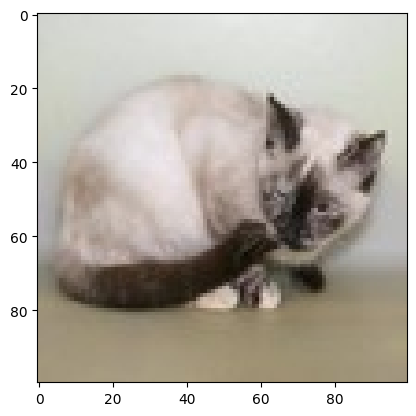

In [9]:
# Generate a random index within the range of the training dataset
idx = random.randint(0, len(X_train))

# Display the image corresponding to the randomly selected index using Matplotlib
plt.imshow(X_train[idx, :])

# Show the image
plt.show()

# Model - 1 (Max Pooling)

In [10]:
# Initialize a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel size, and ReLU activation function.
# Specify the input shape as (100, 100, 3), indicating images of size 100x100 pixels with 3 color channels (RGB).
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))

# Add a max pooling layer with a pool size of 2x2 to downsample the feature maps.
model.add(MaxPooling2D((2,2)))

# Add another convolutional layer with 32 filters, each with a 3x3 kernel size, and ReLU activation function.
model.add(Conv2D(32, (3,3), activation='relu'))

# Add another max pooling layer with a pool size of 2x2 to further downsample the feature maps.
model.add(MaxPooling2D((2,2)))

# Flatten the 2D feature maps into a 1D array to prepare for the fully connected layers.
model.add(Flatten())

# Add a fully connected dense layer with 64 neurons and ReLU activation function.
model.add(Dense(64, activation='relu'))

# Add the output layer with a single neuron and sigmoid activation function for binary classification.
model.add(Dense(1, activation='sigmoid'))


In [11]:
# Compile the model with binary cross-entropy as the loss function,
# Adam optimizer, and accuracy as the metric to evaluate the performance.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model using the training data (X_train and Y_train) for 10 epochs.
# Validate the model's performance using the testing data (X_test and Y_test).
# Store the training history, including loss and accuracy metrics for each epoch.
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5211 - loss: 0.7756 - val_accuracy: 0.5625 - val_loss: 0.6800
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5737 - loss: 0.6698 - val_accuracy: 0.6525 - val_loss: 0.6236
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6612 - loss: 0.6124 - val_accuracy: 0.7025 - val_loss: 0.5818
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7564 - loss: 0.5136 - val_accuracy: 0.7000 - val_loss: 0.5593
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7797 - loss: 0.4879 - val_accuracy: 0.7125 - val_loss: 0.5837
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8286 - loss: 0.3930 - val_accuracy: 0.7175 - val_loss: 0.5843
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8548 - loss: 0.3483 - val_accuracy: 0.7250 - val_loss: 0.6113
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9199 - loss: 0.2227 - val_accuracy: 0.7175 - v

In [13]:
# Print a summary of the model architecture, including information about the layers,
# the number of parameters, and the output shape of each layer.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,280,997 (12.52 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,187,332 (8.34 MB)

The Network Summary shows that (23,23,32) outputs were flattened into vectors of shape (16,928) before going through Dense Layers

In [14]:
# Evaluate the trained model on the testing data (X_test and Y_test) to calculate
# the loss and accuracy metrics. Use verbose=2 to display progress during evaluation.
test_loss,test_acc = model.evaluate(X_test, Y_test, verbose=2)

# Print the accuracy metric obtained on the validation set.
print(f'model accuracy = {test_acc}')

# Print the loss metric obtained on the validation set.
print(f'model loss = {test_loss}')

13/13 - 0s - 13ms/step - accuracy: 0.7100 - loss: 0.8449
model accuracy = 0.7099999785423279
model loss = 0.8448564410209656


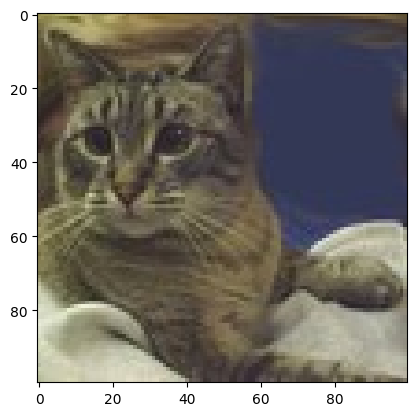

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.5337003]]
Our model says it is a : cat


In [15]:
# Generate a random index within the range of the testing dataset
idx2 = random.randint(0, len(Y_test))

# Display the image corresponding to the randomly selected index using Matplotlib
plt.imshow(X_test[idx2, :])

# Show the image
plt.show()

# Predict the class label of the selected image using the trained model
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

# Print the predicted probability of the image belonging to the positive class (e.g., cat)
print(y_pred)

# Convert the predicted probability to a binary prediction (0 or 1) using a threshold of 0.5
y_pred = y_pred > 0.5

# Check if the predicted class label is 0 (dog) or 1 (cat)
if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'
    
# Print the predicted class label
print("Our model says it is a :", pred)

# Model - 2(Average Pooling)

In [16]:
# Initialize a new Sequential model (model1)
model1 = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel size, and ReLU activation function.
# Specify the input shape as (100, 100, 3), indicating images of size 100x100 pixels with 3 color channels (RGB).
model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))

# Add an average pooling layer with a pool size of 2x2 to downsample the feature maps.
model1.add(AveragePooling2D((2,2)))

# Add another convolutional layer with 32 filters, each with a 3x3 kernel size, and ReLU activation function.
model1.add(Conv2D(32, (3,3), activation='relu'))

# Add another average pooling layer with a pool size of 2x2 to further downsample the feature maps.
model1.add(AveragePooling2D((2,2)))

# Flatten the 2D feature maps into a 1D array to prepare for the fully connected layers.
model1.add(Flatten())

# Add a fully connected dense layer with 64 neurons and ReLU activation function.
model1.add(Dense(64, activation='relu'))

# Add the output layer with a single neuron and sigmoid activation function for binary classification.
model1.add(Dense(1, activation='sigmoid'))

In [17]:
# Compile the model with binary cross-entropy as the loss function,
# Adam optimizer, and accuracy as the metric to evaluate the performance.
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model (model1) using the training data (X_train and Y_train) for 10 epochs.
# Validate the model's performance using the testing data (X_test and Y_test).
# Store the training history, including loss and accuracy metrics for each epoch.
history1 = model1.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4818 - loss: 0.8216 - val_accuracy: 0.5075 - val_loss: 0.6914
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5323 - loss: 0.6912 - val_accuracy: 0.4975 - val_loss: 0.6926
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5537 - loss: 0.6859 - val_accuracy: 0.5500 - val_loss: 0.6800
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5622 - loss: 0.6790 - val_accuracy: 0.5925 - val_loss: 0.6744
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5770 - loss: 0.6785 - val_accuracy: 0.6050 - val_loss: 0.6756
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6424 - loss: 0.6578 - val_accuracy: 0.6450 - val_loss: 0.6592
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6297 - loss: 0.6433 - val_accuracy: 0.6650 - val_loss: 0.6419
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7063 - loss: 0.6105 - val_accuracy: 0.6675 - v

In [19]:
# Evaluate the trained model (model1) on the testing data (X_test and Y_test) to calculate
# the loss and accuracy metrics. Use verbose=2 to display progress during evaluation.
test_loss1,test_acc1 = model1.evaluate(X_test, Y_test, verbose=2)

# Print the accuracy metric obtained on the validation set.
print(f'Validation set accuracy = {test_acc1}')

# Print the loss metric obtained on the validation set.
print(f'Validation set loss = {test_loss1}')

13/13 - 0s - 15ms/step - accuracy: 0.6450 - loss: 0.6249
Validation set accuracy = 0.6449999809265137
Validation set loss = 0.6249132752418518


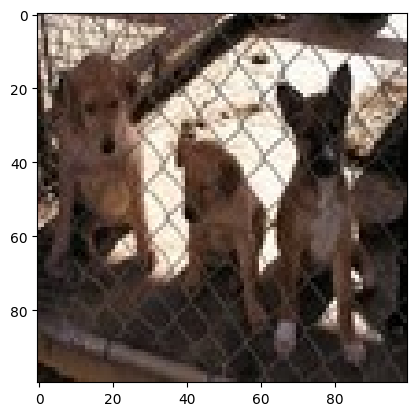

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0.43351012]]
Our model says it is a : dog


In [20]:
# Generate a random index within the range of the testing dataset
idx3 = random.randint(0, len(Y_test))

# Display the image corresponding to the randomly selected index using Matplotlib
plt.imshow(X_test[idx3, :])

# Show the image
plt.show()

# Predict the class label of the selected image using the trained model (model1)
y_pred1 = model1.predict(X_test[idx3, :].reshape(1, 100, 100, 3))

# Print the predicted probability of the image belonging to the positive class (e.g., cat)
print(y_pred1)

# Convert the predicted probability to a binary prediction (0 or 1) using a threshold of 0.5
y_pred1 = y_pred1 > 0.5

# Check if the predicted class label is 0 (dog) or 1 (cat)
if y_pred1 == 0:
    pred1 = 'dog'
else:
    pred1 = 'cat'
    
# Print the predicted class label
print("Our model says it is a :", pred1)

# 6) Results :

# Accuracy difference between Model 1 and Model 2

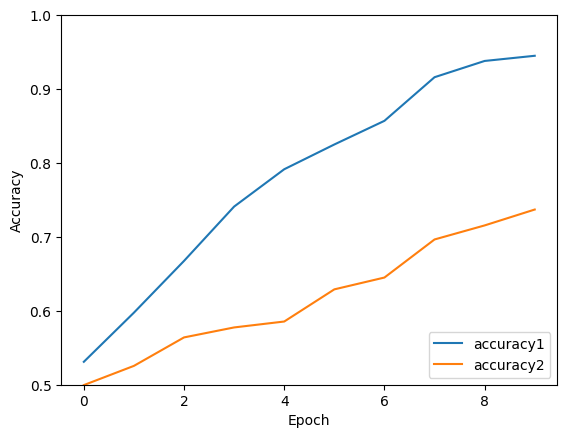

In [21]:
# Plot the training accuracy of the first model (model) and the second model (model1) over epochs
plt.plot(history.history['accuracy'], label='accuracy1')  # Plot accuracy of model
plt.plot(history1.history['accuracy'], label='accuracy2')  # Plot accuracy of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set the y-axis limits to show values between 0.5 and 1
plt.ylim([0.5, 1])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')


# Loss difference between Model1 and Model2

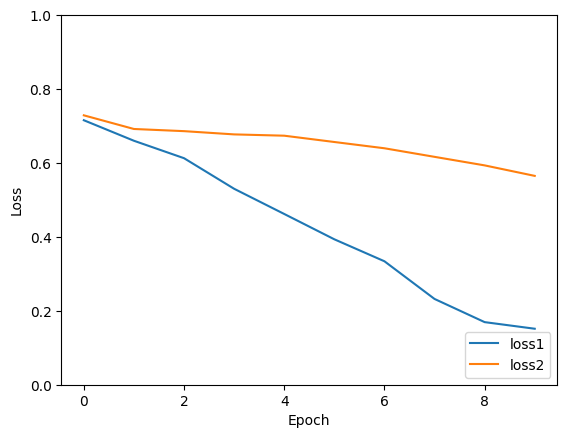

In [22]:
# Plot the training loss of the first model (model) and the second model (model1) over epochs
plt.plot(history.history['loss'], label='loss1')  # Plot loss of model
plt.plot(history1.history['loss'], label='loss2')  # Plot loss of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Set the y-axis limits to show values between 0 and 1
plt.ylim([0, 1])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')

# Val_accuracy for model1 and model2

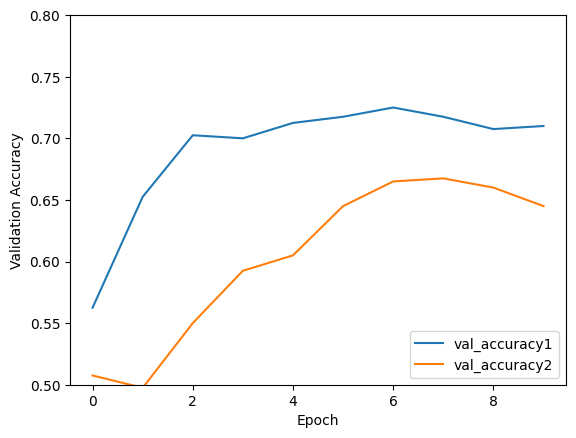

In [23]:
# Plot the validation accuracy of the first model (model) and the second model (model1) over epochs
plt.plot(history.history['val_accuracy'], label='val_accuracy1')  # Plot validation accuracy of model
plt.plot(history1.history['val_accuracy'], label='val_accuracy2')  # Plot validation accuracy of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

# Set the y-axis limits to show values between 0.5 and 0.8
plt.ylim([0.5, 0.8])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')


# val_loss between model1 and model2

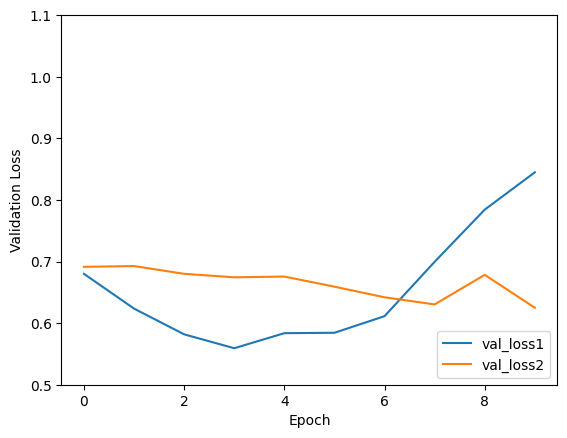

In [24]:
# Plot the validation loss of the first model (model) and the second model (model1) over epochs
plt.plot(history.history['val_loss'], label='val_loss1')  # Plot validation loss of model
plt.plot(history1.history['val_loss'], label='val_loss2')  # Plot validation loss of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

# Set the y-axis limits to show values between 0.5 and 1.1
plt.ylim([0.5, 1.1])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')


# Graph between Accuracy and Validation_Accuracy for Model-1

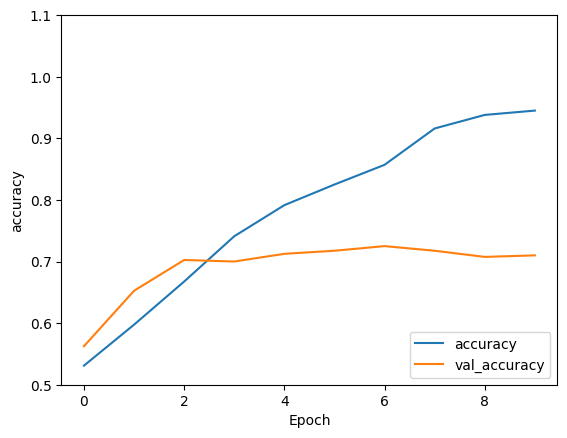

In [26]:
# Plot the validation loss of the first model (model) and the second model (model1) over epochs
plt.plot(history.history['accuracy'], label='accuracy')  # Plot validation loss of model
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plot validation loss of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('accuracy')

# Set the y-axis limits to show values between 0.5 and 1.1
plt.ylim([0.5, 1.1])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')

# Graph between Accuracy and Validation_Accuracy for Model-2

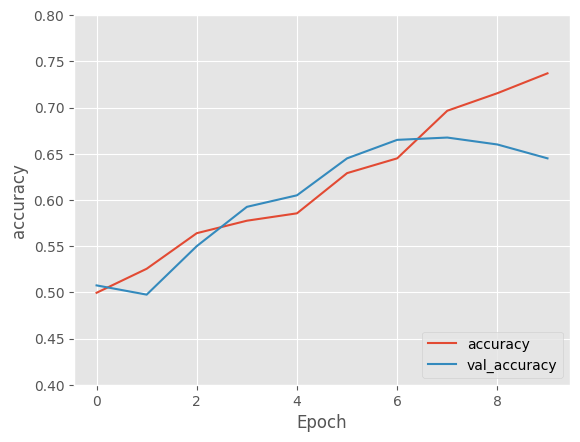

In [34]:
# Plot the validation loss of the first model (model) and the second model (model1) over epochs
plt.plot(history1.history['accuracy'], label='accuracy')  # Plot validation loss of model
plt.plot(history1.history['val_accuracy'], label='val_accuracy')  # Plot validation loss of model1

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('accuracy')

# Set the y-axis limits to show values between 0.5 and 1.1
plt.ylim([0.4, 0.8])

# Add a legend to the plot indicating which line represents which model
plt.legend(loc='lower right')

# Graph between Training and Validation Accuracy and Loss of Model-1(Max Pooling) 

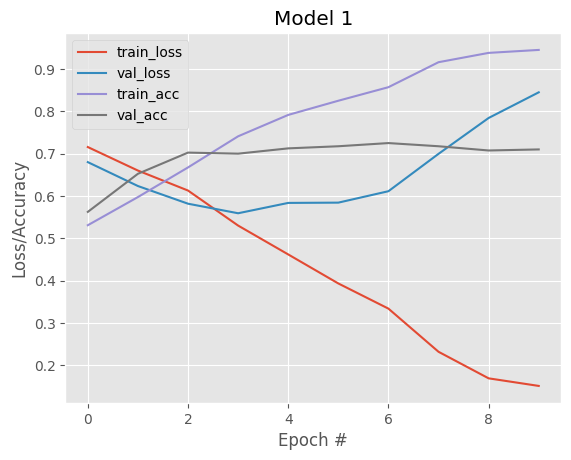

In [37]:
# Set the plotting style to "ggplot" for consistent visual style
plt.style.use("ggplot")
# Initialize a new figure for plotting
plt.figure()
# Plot training loss over epochs with label "train_loss"
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
# Plot validation loss over epochs with label "val_loss"
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
# Plot training accuracy over epochs with label "train_acc"
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
# Plot validation accuracy over epochs with label "val_acc"
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
# Set the title of the plot to "Model 1"
plt.title("Model 1")
# Set the label for the x-axis to "Epoch #"
plt.xlabel("Epoch #")
# Set the label for the y-axis to "Loss/Accuracy"
plt.ylabel("Loss/Accuracy")
# Display a legend on the plot to label each line
plt.legend()
# Display the plot on the screen
plt.show()


# Graph between Training and Validation Accuracy and Loss of Model-2(Average Pooling) 

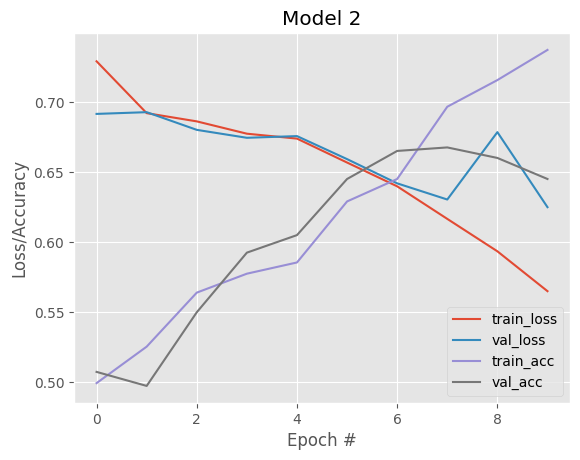

In [38]:
# Set the plotting style to "ggplot" for consistent visual style
plt.style.use("ggplot")
# Initialize a new figure for plotting
plt.figure()
# Plot training loss over epochs with label "train_loss"
plt.plot(np.arange(0, 10), history1.history["loss"], label="train_loss")
# Plot validation loss over epochs with label "val_loss"
plt.plot(np.arange(0, 10), history1.history["val_loss"], label="val_loss")
# Plot training accuracy over epochs with label "train_acc"
plt.plot(np.arange(0, 10), history1.history["accuracy"], label="train_acc")
# Plot validation accuracy over epochs with label "val_acc"
plt.plot(np.arange(0, 10), history1.history["val_accuracy"], label="val_acc")
# Set the title of the plot to "Model 2"
plt.title("Model 2")
# Set the label for the x-axis to "Epoch #"
plt.xlabel("Epoch #")
# Set the label for the y-axis to "Loss/Accuracy"
plt.ylabel("Loss/Accuracy")
# Display a legend on the plot to label each line
plt.legend()
# Display the plot on the screen
plt.show()


# 7) Conclusion :

In [25]:
print(f'model1 accuracy = {test_acc} and model2 accuracy = {test_acc1}')
print(f'model1 loss = {test_loss} and model2 loss = {test_loss1}')


model1 accuracy = 0.7099999785423279 and model2 accuracy = 0.6449999809265137
model1 loss = 0.8448564410209656 and model2 loss = 0.6249132752418518


#### - Model 1 achieves a higher accuracy of approximately 71%, compared to Model 2, which achieves an accuracy of approximately 64%.
#### - However, Model 1 also has a higher loss value of approximately 0.84, whereas Model 2 has a lower loss value of approximately 0.62.
#### - Therefore, while Model 1 performs better in terms of accuracy, it does so at the cost of higher loss, indicating that it might be overfitting to the training data.
#### - On the other hand, Model 2 achieves a slightly lower accuracy but with a lower loss value, suggesting that it may generalize better to unseen data.

#### - The discrepancy in performance between Model 1 (with max pooling) and Model 2 (with average pooling) suggests that there are differences in how these pooling techniques affect the models' generalization capabilities. Here's how each pooling technique could be mitigating overfitting:

#### 1. Max Pooling (Used in Model 1):
   - #### Intuition: Max pooling retains the maximum value within each pooling region, discarding all other information. By selecting only the most prominent features, max pooling encourages the model to focus on the most salient aspects of the data, which can help in capturing important patterns while ignoring noise or irrelevant details. However, this aggressive reduction in information might lead to overfitting if the model becomes too reliant on a small set of features, potentially memorizing noise in the training data.

#### 2. Average Pooling (Used in Model 2):
   - #### Intuition: Average pooling computes the average value within each pooling region, providing a smoother representation of the data compared to max pooling. By averaging out the information, average pooling tends to preserve more spatial information and reduce the risk of overfitting. This smoother representation helps in capturing general trends in the data while being less susceptible to noise or outliers. Therefore, Model 2 with average pooling may generalize better to unseen data because it learns a more stable and robust representation of the input features.

#### - In summary, while both max pooling and average pooling are commonly used techniques for dimensionality reduction in convolutional neural networks, they have different effects on the model's ability to generalize to unseen data. Max pooling, although effective at capturing prominent features, might lead to overfitting by discarding too much information, while average pooling provides a smoother representation that is more resilient to noise and may lead to better generalization. Therefore, the choice of pooling technique can significantly impact the model's performance and its ability to mitigate overfitting.